In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
import tensorflow as tf
%matplotlib inline
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

import sklearn
from sklearn.preprocessing import StandardScaler
df=pd.read_csv('45 channel 1sec E with labels.csv')
df.columns = [*df.columns[:-1], 'lables']

print('Number of rows and columns:', df.shape)
df.head(5)


Number of rows and columns: (8391, 46)


,0.68076,1.2454,0.99634,0.46706,0.54067,0.62232,0.5631,0.54402,0.4581,0.50043,0.54611,0.52423,0.45818,0.48625,0.41659,0.269,1.7474,0.25971,1.05,0.22824,0.31949,0.28923,1.4527,2.098,0.72331,0.5985,0.42232,0.47304,0.3714,0.49438,0.50545,0.47079,0.53424,0.49933,0.4637,0.23168,4.3685,0.23481,0.80436,0.72683,0.40509,0.25687,0.35344,0.37676,1.7901,lables
0,0.5128,0.7870,0.3694,0.5179,0.4808,0.5028,0.5416,0.3878,0.4797,0.3433,0.5264,0.4263,0.3865,0.3389,0.6363,1.2031,2.1468,0.4969,0.5930,1.1563,1.4317,3.6299,0.7537,1.4710,0.4432,0.4097,0.4953,0.1601,0.4787,0.4470,0.4522,0.4354,0.5001,0.4540,0.4760,0.6989,1.7578,0.9526,0.4869,1.5443,0.6612,1.1812,1.6514,0.7864,0.6341,1
1,0.3529,0.8960,0.6176,0.3609,0.6323,0.2516,0.6836,0.7771,0.3767,0.3671,0.4047,0.7819,0.4419,0.4399,0.4012,0.3248,3.2313,0.2606,0.8227,0.3599,0.3418,1.1976,0.7530,2.0558,0.4282,0.3925,0.6991,0.6387,0.3256,0.2855,0.2695,0.6841,0.4849,0.3401,0.6657,0.5028,3.3953,0.2630,1.0573,0.3432,0.3802,0.3105,1.0821,0.3711,1.3309,1
2,0.6724,1.4262,1.6294,0.3422,0.3451,0.3775,1.3040,0.6958,0.2214,0.3168,0.4394,0.8171,0.4584,0.3885,0.6686,0.5311,1.7571,0.6375,0.7909,0.5702,0.8321,0.8029,1.0524,0.6428,0.3355,0.3615,1.3745,0.6045,0.2949,0.3535,0.4613,1.1546,0.3399,0.3785,0.8814,0.7913,1.8442,0.5473,0.5567,0.5320,0.4228,0.4369,0.4775,1.0578,0.6428,1
3,0.7202,0.4590,0.4590,0.4899,0.4869,0.6042,2.5726,1.4091,0.4674,0.4883,0.7541,1.6759,0.4614,0.4707,2.5054,0.4693,1.2531,1.1461,1.3695,0.5069,0.4075,0.7046,0.8478,1.1202,0.5287,0.3997,1.6971,0.3674,0.4570,0.4643,0.4493,2.3020,0.5181,0.4763,1.9226,1.4343,1.7102,1.9475,1.6780,0.9095,1.9118,0.5218,0.6688,0.7397,0.7260,1
4,2.2720,4.0882,1.3721,0.1681,0.3682,0.4915,0.3961,0.3157,0.3204,0.3233,0.4163,0.3147,0.2732,0.3607,0.4376,0.3011,0.8461,0.4258,0.7354,0.6130,0.5637,0.5684,1.6271,1.8019,0.2434,0.4269,0.4177,0.3088,0.2275,0.4321,0.6544,0.3603,0.4004,0.5178,0.3287,0.7726,0.5201,0.2699,0.3326,0.3830,0.5330,0.3859,1.2871,0.6543,1.2096,1




**Labelling COLUMNS**

In [24]:
print(df.columns)

Index(['0.68076', '1.2454', '0.99634', '0.46706', '0.54067', '0.62232',
       '0.5631', '0.54402', '0.4581', '0.50043', '0.54611', '0.52423',
       '0.45818', '0.48625', '0.41659', '0.269', '1.7474', '0.25971', '1.05',
       '0.22824', '0.31949', '0.28923', '1.4527', '2.098', '0.72331', '0.5985',
       '0.42232', '0.47304', '0.3714', '0.49438', '0.50545', '0.47079',
       '0.53424', '0.49933', '0.4637', '0.23168', '4.3685', '0.23481',
       '0.80436', '0.72683', '0.40509', '0.25687', '0.35344', '0.37676',
       '1.7901', 'lables'],
      dtype='object')


In [25]:
new_names = {'0.68076':'a', '1.2454':'b', '0.99634':'c', '0.46706':'d','0.54067':'de','0.62232':'e','0.5631':'f', '0.54402':'g', '0.4581':'h', '0.50043':'i', '0.54611':'j', '0.52423':'k',
       '0.45818':'l', '0.48625':'m', '0.41659':'n', '0.269':'o', '1.7474':'p', '0.25971':'q', '1.05':'r',
       '0.22824':'s', '0.31949':'t', '0.28923':'u', '1.4527':'v', '2.098':'w', '0.72331':'x', '0.5985':'y',
       '0.42232':'z', '0.47304':'aa', '0.3714':'bb', '0.49438':'cc', '0.50545':'dd', '0.47079':'ee',
       '0.53424':'ff', '0.49933':'gg', '0.4637':'hh', '0.23168':'ii', '4.3685':'jj', '0.23481':'kk',
       '0.80436':'ll', '0.72683':'mm', '0.40509':'nn', '0.25687':'oo', '0.35344':'pp', '0.37676':'qq',
       '1.7901':'rr'}
dataframe = df.rename(index=str, columns=new_names)

***Checking any null Values***

In [26]:

dataframe.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8391 entries, 0 to 8390
Data columns (total 46 columns):
a         8391 non-null float64
b         8391 non-null float64
c         8391 non-null float64
d         8391 non-null float64
de        8391 non-null float64
e         8391 non-null float64
f         8391 non-null float64
g         8391 non-null float64
h         8391 non-null float64
i         8391 non-null float64
j         8391 non-null float64
k         8391 non-null float64
l         8391 non-null float64
m         8391 non-null float64
n         8391 non-null float64
o         8391 non-null float64
p         8391 non-null float64
q         8391 non-null float64
r         8391 non-null float64
s         8391 non-null float64
t         8391 non-null float64
u         8391 non-null float64
v         8391 non-null float64
w         8391 non-null float64
x         8391 non-null float64
y         8391 non-null float64
z         8391 non-null float64
aa        8391 non-null float64
bb

In [27]:
pd.set_option('display.max_columns', None)
print(dataframe.describe())



              a         b         c         d        de         e         f  \
count 8391.0000 8391.0000 8391.0000 8391.0000 8391.0000 8391.0000 8391.0000   
mean     0.7511    0.6590    0.7365    0.7032    0.6408    0.4951    0.6424   
std      0.7782    0.6898    0.8358    1.0544    0.7888    0.4635    0.7968   
min      0.0274    0.0377    0.0224    0.0227    0.0218    0.0176    0.0247   
25%      0.3139    0.2768    0.2958    0.2593    0.2547    0.2133    0.2611   
50%      0.5354    0.4612    0.4996    0.4402    0.4403    0.3606    0.4383   
75%      0.9280    0.7901    0.8786    0.7654    0.7606    0.6145    0.7525   
max     23.6110   14.4110   15.3870   21.8390   19.9330    6.4537   23.7490   

              g         h         i         j         k         l         m  \
count 8391.0000 8391.0000 8391.0000 8391.0000 8391.0000 8391.0000 8391.0000   
mean     0.7525    0.8415    0.5379    0.5785    0.7912    0.7357    0.5173   
std      1.3600    1.8800    0.5346    0.6860    1.

***spliting the file in the data and target class***

In [28]:
data = dataframe.iloc[:,:-1].values.tolist()
target = dataframe.iloc[:,-1].tolist()
# deleting values above then 7
arr = np.array(data)
arr = np.delete(arr, np.argwhere(arr > 7))

In [29]:
print(data)
print(target)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



**heatmap**

Text(0.5, 1.0, 'Correlation of Variables')

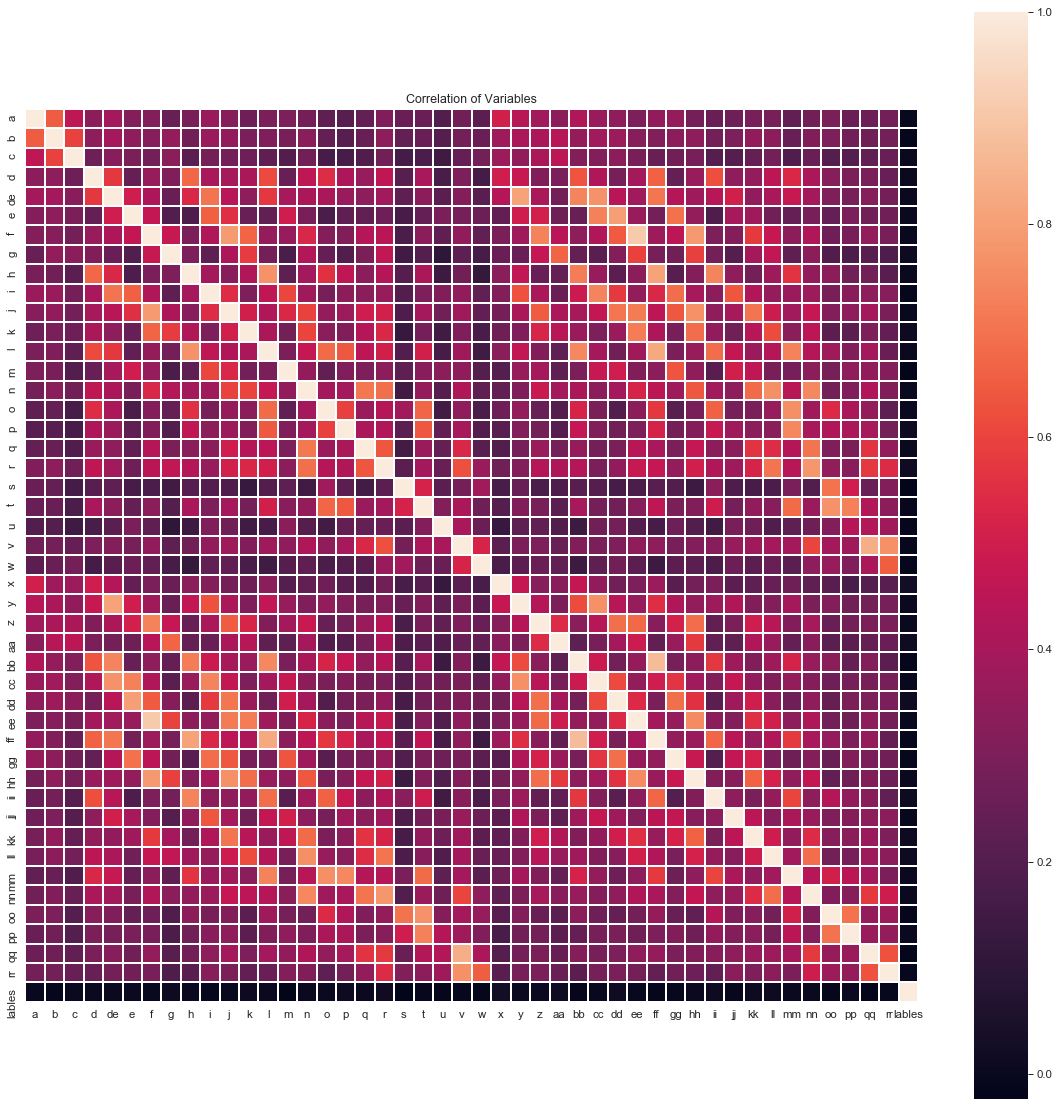

In [30]:
col_list = dataframe.columns
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(dataframe[col_list].corr(),square=True,linewidths=1)
plt.title('Correlation of Variables')

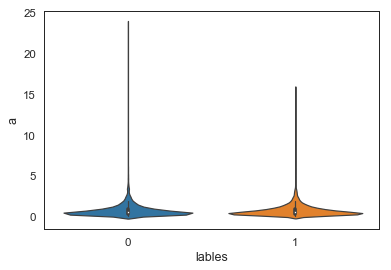

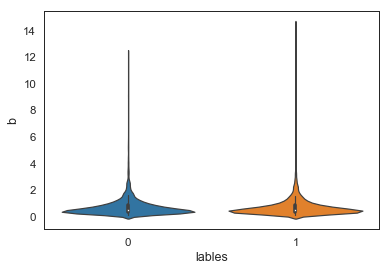

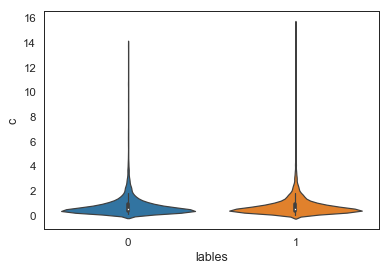

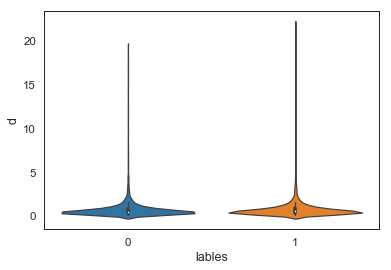

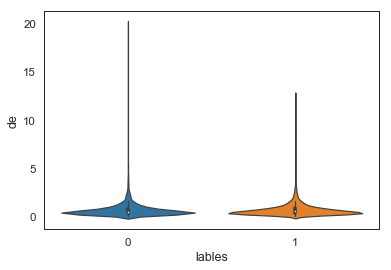

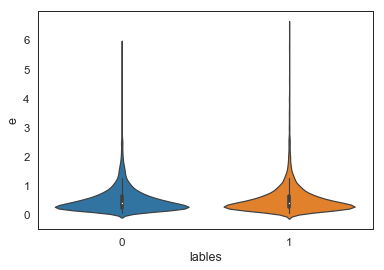

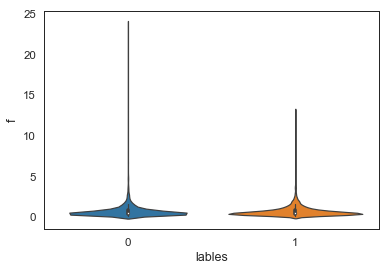

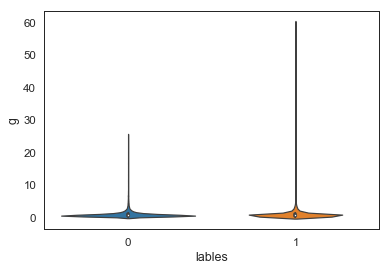

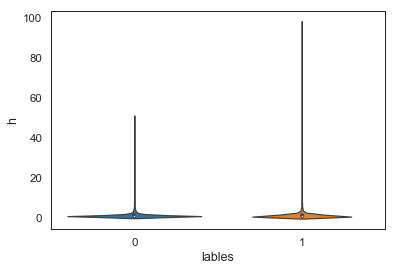

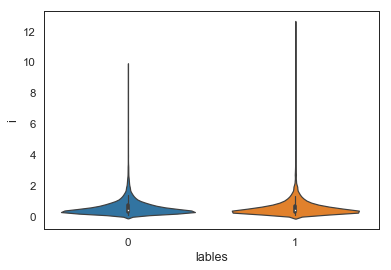

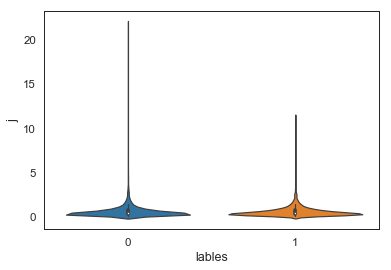

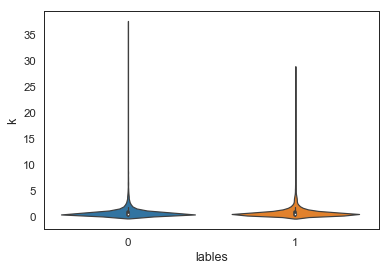

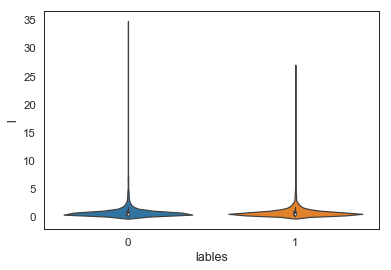

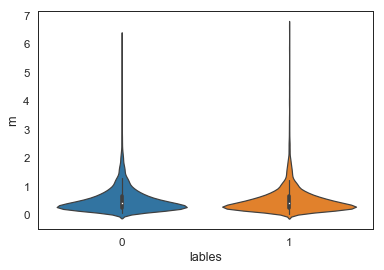

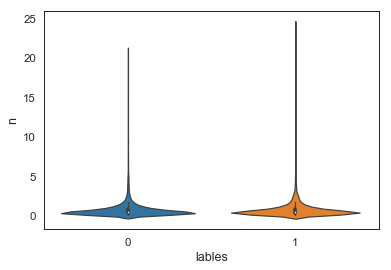

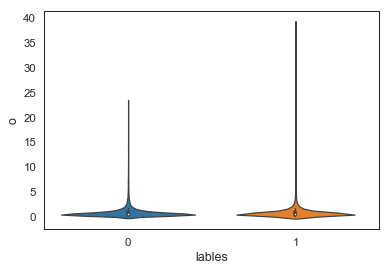

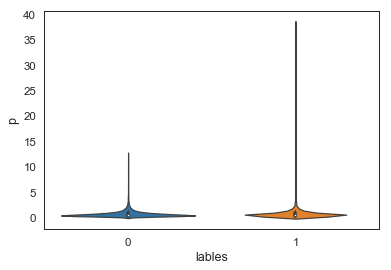

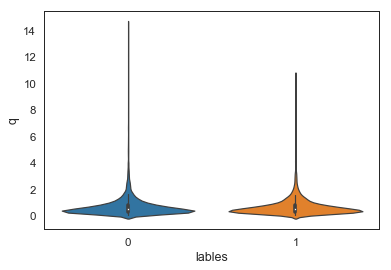

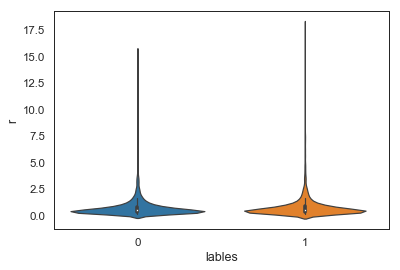

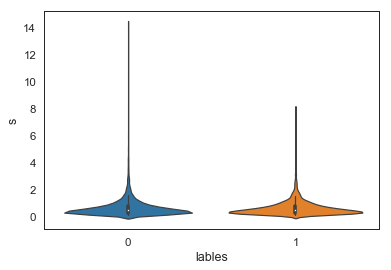

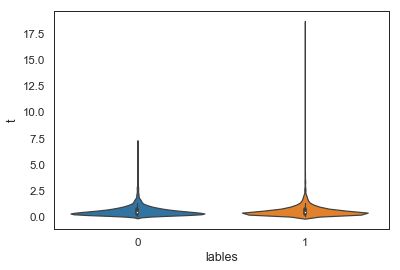

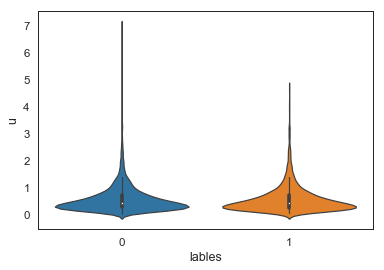

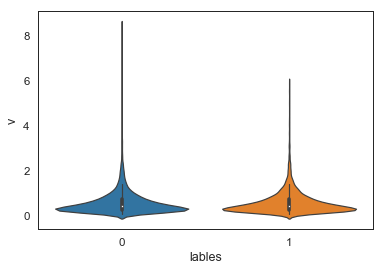

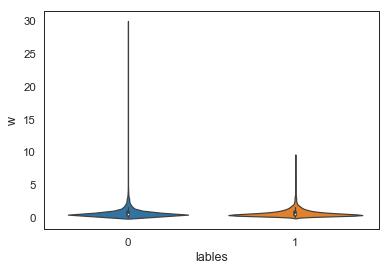

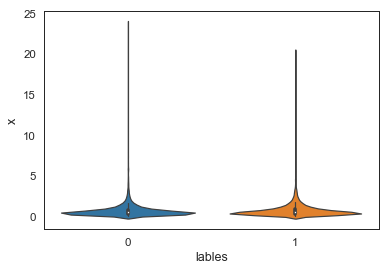

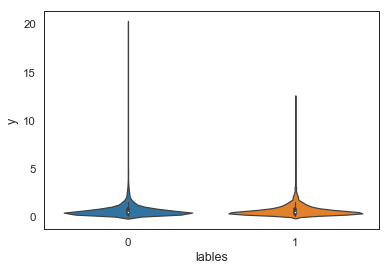

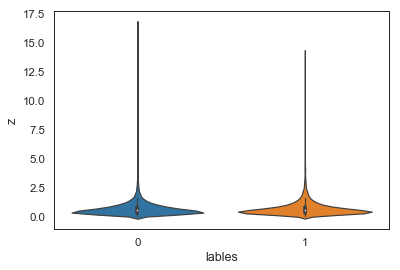

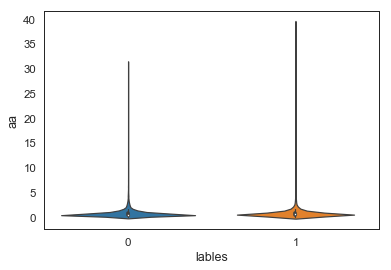

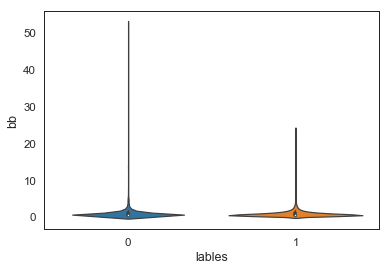

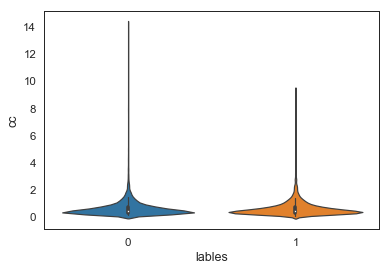

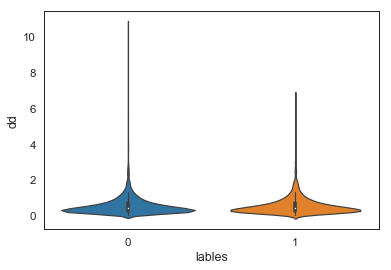

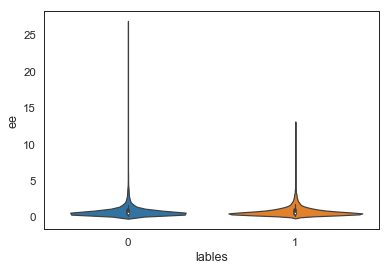

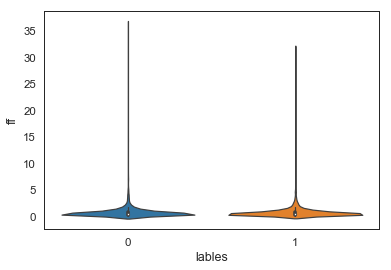

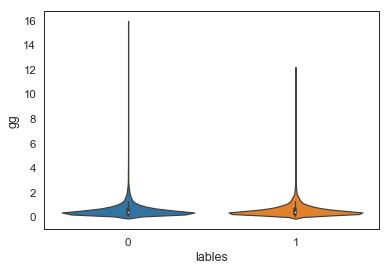

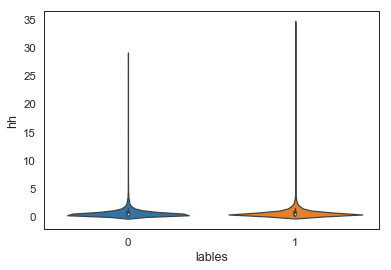

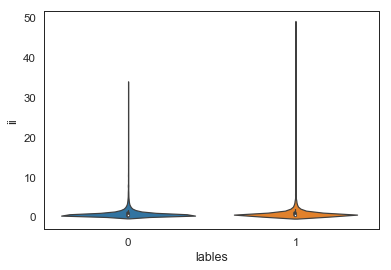

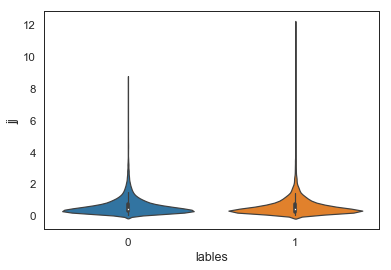

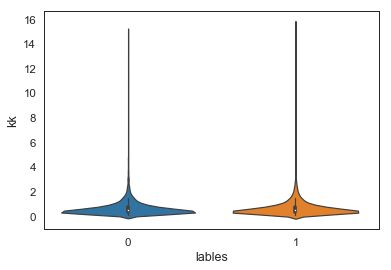

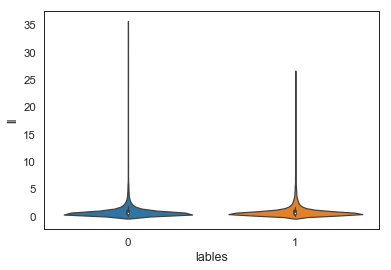

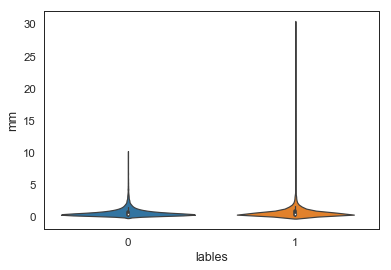

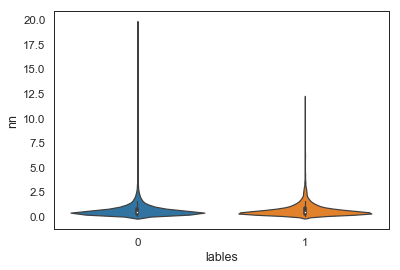

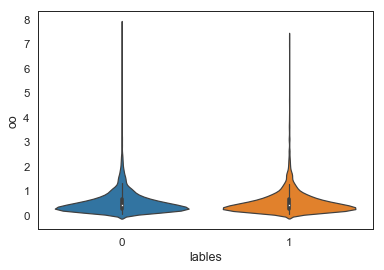

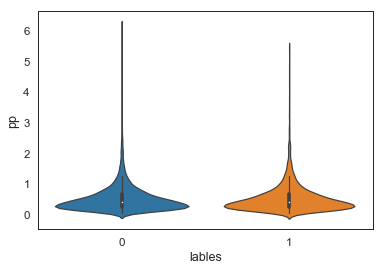

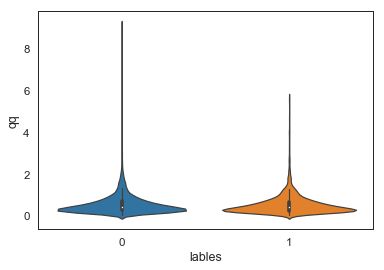

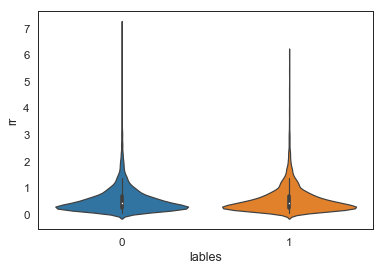

In [31]:
cols = dataframe.columns

size = len(cols)-1


x = cols[size]


y = cols[0:size]

#Plot violin for all attributes
for i in range(0,size):
    sns.violinplot(data=dataframe,x=x,y=y[i])  
    plt.show()


**Normalizing**

In [32]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
x =dataframe[dataframe.columns[:46]]
y =dataframe.lables
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.7, random_state =  90)

 **Select numerical columns which needs to be normalized**

In [33]:
train_norm = x_train[x_train.columns[0:20]]
test_norm = x_test[x_test.columns[0:20]]

**Normalize Training Data**

In [34]:
std_scale = preprocessing.StandardScaler().fit(train_norm)
x_train_norm = std_scale.transform(train_norm)

**Converting numpy array to dataframe**

In [35]:
training_norm_col = pd.DataFrame(x_train_norm, index=train_norm.index, columns=train_norm.columns) 
x_train.update(training_norm_col)
print (x_train.head())

           a       b       c       d      de       e       f       g       h  \
1585 -0.0175 -0.5406 -0.5883  0.3607 -0.6278 -0.4668  0.2672 -0.0329 -0.2597   
992  -0.3618 -0.6353 -0.4484 -0.5452 -0.4203 -0.9018 -0.3529 -0.5416 -0.0681   
8204 -0.2394 -0.3759 -0.6697 -0.2610 -0.3178 -0.5481 -0.4196 -0.4523 -0.2574   
4674 -0.6092 -0.6008 -0.3088 -0.3286 -0.4253  0.3545  0.8914  0.4980 -0.0498   
3593 -0.5805 -0.3881 -0.5365 -0.3941 -0.4935 -0.3985 -0.5344  0.0476 -0.2151   

           i       j       k       l       m       n       o       p       q  \
1585 -0.7512 -0.4334 -0.0038 -0.2928 -0.5228 -0.2866  0.1466 -0.3067 -0.6041   
992  -0.1036  0.1346  0.0367 -0.3794  0.3740  0.0681 -0.2691  0.0840 -0.4353   
8204 -0.5074 -0.5618 -0.3629 -0.2558 -0.6987 -0.4813 -0.5336 -0.4363 -0.8459   
4674  0.2431  0.1443 -0.1255 -0.4374 -0.1051 -0.5519 -0.3701 -0.5680 -0.7492   
3593  0.1982 -0.3288 -0.3205  0.0665 -0.3101 -0.4062 -0.2390 -0.0656 -0.4312   

           r       s      t      u    

**Normalize Testing Data by using mean and SD of training set**

In [36]:
x_test_norm = std_scale.transform(test_norm)
testing_norm_col = pd.DataFrame(x_test_norm, index=test_norm.index, columns=test_norm.columns) 
x_test.update(testing_norm_col)
print (x_train.head())

           a       b       c       d      de       e       f       g       h  \
1585 -0.0175 -0.5406 -0.5883  0.3607 -0.6278 -0.4668  0.2672 -0.0329 -0.2597   
992  -0.3618 -0.6353 -0.4484 -0.5452 -0.4203 -0.9018 -0.3529 -0.5416 -0.0681   
8204 -0.2394 -0.3759 -0.6697 -0.2610 -0.3178 -0.5481 -0.4196 -0.4523 -0.2574   
4674 -0.6092 -0.6008 -0.3088 -0.3286 -0.4253  0.3545  0.8914  0.4980 -0.0498   
3593 -0.5805 -0.3881 -0.5365 -0.3941 -0.4935 -0.3985 -0.5344  0.0476 -0.2151   

           i       j       k       l       m       n       o       p       q  \
1585 -0.7512 -0.4334 -0.0038 -0.2928 -0.5228 -0.2866  0.1466 -0.3067 -0.6041   
992  -0.1036  0.1346  0.0367 -0.3794  0.3740  0.0681 -0.2691  0.0840 -0.4353   
8204 -0.5074 -0.5618 -0.3629 -0.2558 -0.6987 -0.4813 -0.5336 -0.4363 -0.8459   
4674  0.2431  0.1443 -0.1255 -0.4374 -0.1051 -0.5519 -0.3701 -0.5680 -0.7492   
3593  0.1982 -0.3288 -0.3205  0.0665 -0.3101 -0.4062 -0.2390 -0.0656 -0.4312   

           r       s      t      u    

**Support vector machine**

In [37]:
import numpy
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [18]:
def svm_classifier(): 
    file_x = '45 channel 1sec EI.csv'
    file_y = 'Label.csv'
    
    X = data
    y = target 
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
   
    	

     # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)    
    X_test = sc.transform(X_test)

    # SVM Classifier
    clf = SVC(kernel = 'rbf', random_state = 50)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    print(cm)
    print("Accuracy score : ")
    print(accuracy_score(y_test, y_predict)*100)
    
if __name__ == '__main__':
    svm_classifier()

[[2801  118]
 [1990  126]]
Accuracy score : 
58.1330685203575


**sequential model**

In [38]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
   



model = Sequential()
model.add(Dense(64, input_dim=46, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=25,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

Epoch 1/25
5873/5873 [==============================] - 1s 225us/step - loss: 0.7161 - acc: 0.5282
Epoch 2/25
5873/5873 [==============================] - 0s 55us/step - loss: 0.6970 - acc: 0.5616
Epoch 3/25
5873/5873 [==============================] - 0s 55us/step - loss: 0.6867 - acc: 0.5697
Epoch 4/25
5873/5873 [==============================] - 0s 55us/step - loss: 0.6856 - acc: 0.5706
Epoch 5/25
5873/5873 [==============================] - 0s 54us/step - loss: 0.6755 - acc: 0.5742
Epoch 6/25
5873/5873 [==============================] - 0s 55us/step - loss: 0.6477 - acc: 0.5755
Epoch 7/25
5873/5873 [==============================] - 0s 54us/step - loss: 0.5812 - acc: 0.5963
Epoch 8/25
5873/5873 [==============================] - 0s 55us/step - loss: 0.5079 - acc: 0.7916
Epoch 9/25
5873/5873 [==============================] - 0s 55us/step - loss: 0.4420 - acc: 0.8806
Epoch 10/25
5873/5873 [==============================] - 0s 54us/step - loss: 0.4028 - acc: 0.9040
Epoch 11/25
5873/5

**LSTM MODELLING**

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping

max_features = 1024

model = Sequential()
model.add(Embedding(max_features, output_dim=256))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


model.fit(x_train, y_train, batch_size=2, epochs=10 )
score = model.evaluate(x_test, y_test, batch_size=16)

Epoch 1/10
5873/5873 [==============================] - 233s 40ms/step - loss: 0.0152 - acc: 0.9937
Epoch 2/10
5873/5873 [==============================] - 233s 40ms/step - loss: 1.0934e-07 - acc: 1.0000
Epoch 3/10
5873/5873 [==============================] - 231s 39ms/step - loss: 1.0979e-07 - acc: 1.0000
Epoch 4/10
5873/5873 [==============================] - 230s 39ms/step - loss: 1.0854e-07 - acc: 1.0000
Epoch 5/10
5873/5873 [==============================] - 230s 39ms/step - loss: 1.0823e-07 - acc: 1.0000
Epoch 6/10
5873/5873 [==============================] - 233s 40ms/step - loss: 1.0821e-07 - acc: 1.0000
Epoch 7/10
5873/5873 [==============================] - 235s 40ms/step - loss: 1.0832e-07 - acc: 1.0000
Epoch 8/10
5873/5873 [==============================] - 237s 40ms/step - loss: 1.0835e-07 - acc: 1.0000
Epoch 9/10
5873/5873 [==============================] - 235s 40ms/step - loss: 1.0832e-07 - acc: 1.0000
Epoch 10/10
2518/2518 [==============================] - 4s 2ms/step